## CreditCard Fraud

The main idea is to build a model to identify the transactions that are suspicious or considered fraud. This is a highly imbalanced dataset and hence we have used a Sampling method to deal with this. Basically there are three models that are explored in this project: Random Forest Classifier, XGBoost and Lightgbm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit, cross_val_score
from imblearn.over_sampling import ADASYN
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, recall_score, roc_auc_score

import xgboost as xgb
import lightgbm as lgb

Read data from the input file

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are a total of 284807 rows and 31 columns. There are no missing or null values in the dataset.

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Exploration

Time, Amount and Class are the the only raw data and the rest V1 - V28 are PCA transformed values. Class is the target column where 1 indicates fraud and 0 not fraud. 

0    284315
1       492
Name: Class, dtype: int64


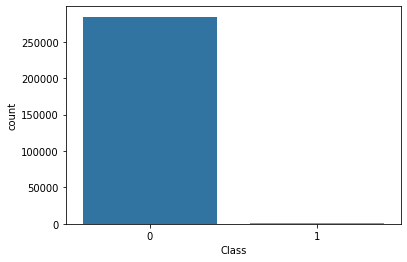

In [5]:
print(data.Class.value_counts())

sns.countplot(x='Class',data=data)

This is a highly unbalanced dataset. Its important to balance the dataset to avoid biasing during modeling.

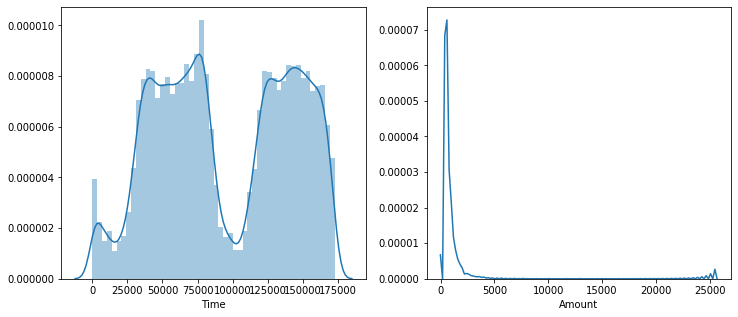

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
sns.distplot(data['Time'], ax=ax1)
sns.distplot(data['Amount'], hist=False, ax= ax2)

#### Correlation between features

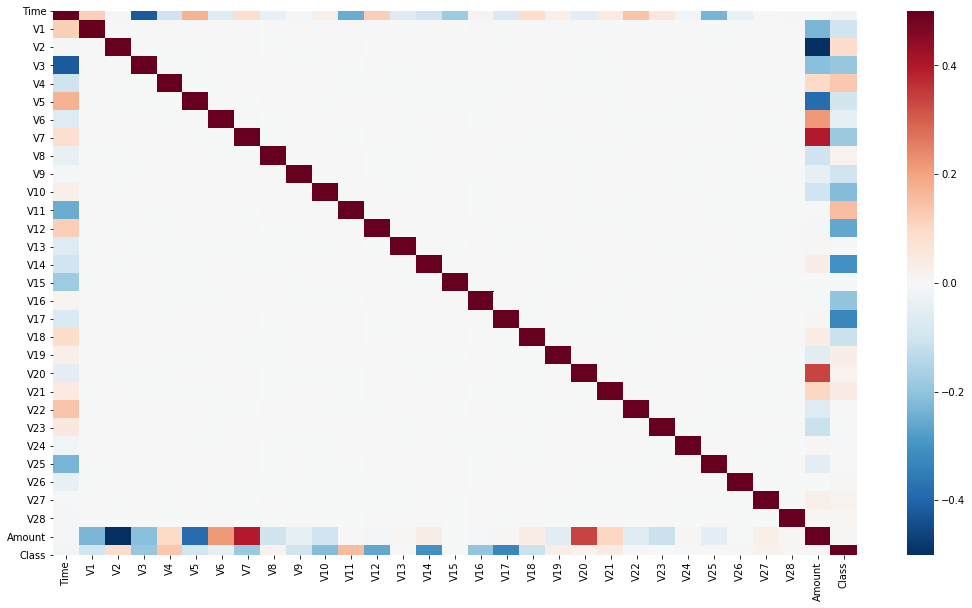

In [7]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrmat,cmap='RdBu_r',vmax=0.5,vmin=-0.5)


As in the above heatmap, red shows high positive correlation and blue indicates negative correlation. There is no correlation between V1 to V28.

V7 and V20 have a positive correlation with Amount and V2 has a negative correlation with Amount.

V12, V14 and V17 has a negative correlation with Class variable and V3 has a negative correlation with Time.

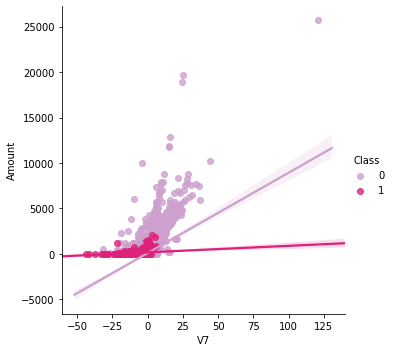

In [8]:
sns.lmplot(x="V7", y="Amount", hue="Class", palette="PuRd", data=data)

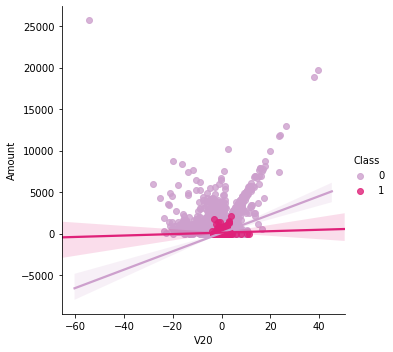

In [9]:
sns.lmplot(x="V20", y="Amount", hue="Class", palette="PuRd", data=data)

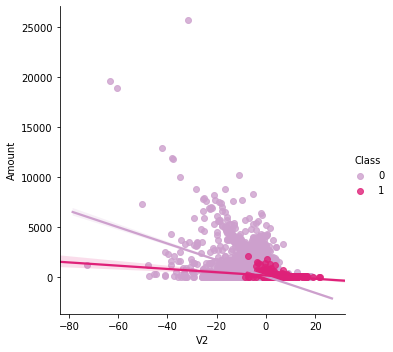

In [10]:
sns.lmplot(x="V2", y="Amount", hue="Class", palette="PuRd", data=data)

## Model Building

Segregate the features to predictive features and target feature.

In [11]:
X = data.drop('Class',axis=1)
y = data['Class']

### Random Forest Classifier

Split the dataset to training data and testing data. Use the stratify parameter to ensure the class variables are distributed equally in both training and test data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state = 42)

Since the target variable is highly imbalanced, we will use the SMOTE method to do the Sampling process. To avoid any kind of data leakage, we will use a pipeline to use SMOTE along with the cross validation procedure. In addition to adding SMOTE, add the model to make things easier. 

In [13]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier(n_estimators=100, random_state=13))

We are using the KFold cross validation procedure where the data is split into 5 folds

In [14]:
kf = KFold(n_splits=5, random_state=42)
params = {
    'n_estimators': [100],
    'random_state': [13]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}

In [15]:
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_imba.fit(X_train, y_train)
print(grid_imba.best_score_)

0.8296842389684146


Predict the recall for the test data

In [16]:
recall_score(y_test, grid_imba.predict(X_test))

0.8040540540540541

### XGBoost

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3,  stratify=y, random_state=45)
kf = KFold(n_splits=5, random_state=42)
xgb_pipeline = Pipeline([ ('smt',SMOTE(random_state=42)), 
                               ('xgbc',xgb.XGBClassifier())])

param_grid = {
    "xgbc__n_estimators": [100],
    "xgbc__learning_rate": [0.1]
}

In [18]:
grid_xgb = GridSearchCV(xgb_pipeline, param_grid, cv=kf, scoring='recall')
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smt',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=42, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('xgbc',
                                        XGBClassifier(base_score=0...
                                                      n_jobs=1, nthread=None,
                                                      objective='binary:logistic',
                                                      random_s

In [19]:
print('Train Score for XGBoost: ',grid_xgb.best_score_)
print('Test Score for XGBoost: ',recall_score(y_test, grid_xgb.predict(X_test)))

Train Score for XGBoost:  0.8696135054347466
Test Score for XGBoost:  0.8716216216216216


This score is much better than Random Forest classifier. 

### Lightgbm

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2,  stratify=y, random_state=45)

model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=30, max_depth=5, learning_rate=0.1, num_boost_round =50)
lgbm_pipeline = Pipeline([ ('smt',SMOTE(random_state=42)), 
                               ('lgbm',model)])
params_opt = {'lgbm__n_estimators':range(100)}

In [21]:
grid_lgbm = GridSearchCV(lgbm_pipeline, param_grid = params_opt, scoring='recall', n_jobs=4, iid=False, verbose=1, cv=5)
grid_lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 30.8min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 34.8min finished
F:\ProgramFiles\Anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('smt',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=42, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1...
                                                       n_estimators=100,
                                                     

In [22]:
print('Train Score for Lightgbm: ',grid_lgbm.best_score_)
print('Test Score for Lightgbm: ',recall_score(y_test, grid_lgbm.predict(X_test)))

Train Score for Lightgbm:  0.8629016553067185
Test Score for Lightgbm:  0.8877551020408163


The values for Recall for both XGBoost and Lightgbm are somewhat similar and both of them perform much better than the Random Forest Classifier. Gradient Boosting algorithms have better results.